In [44]:
import pandas as pd
import os
import csv
import io
import numpy as np

segment_id = 78

filename = f'temperature_degree_c/{segment_id}_temperature_degree_c.csv'

df = pd.read_csv(filename, parse_dates=['timestamp_utc'], index_col='timestamp_utc', date_format="%m/%d/%Y %I:%M:%S %p")
# todo: figure out why the data is always sorted
df = df.sort_index()

In [45]:
percentage = 10

num_rows = len(df)
num_missing = int(num_rows * percentage / 100)
    
# Ensure at least one row is set as missing
num_missing = max(1, num_missing)

# Randomly select a starting index for the contiguous block
start_index = np.random.randint(0, num_rows - num_missing + 1)

df['missing'] = df.iloc[:,0]
# Set the contiguous block of rows as missing (NaN)
df.iloc[start_index:start_index + num_missing, df.columns.get_loc('missing')] = np.nan

df_original = df.copy()

<Axes: xlabel='timestamp_utc'>

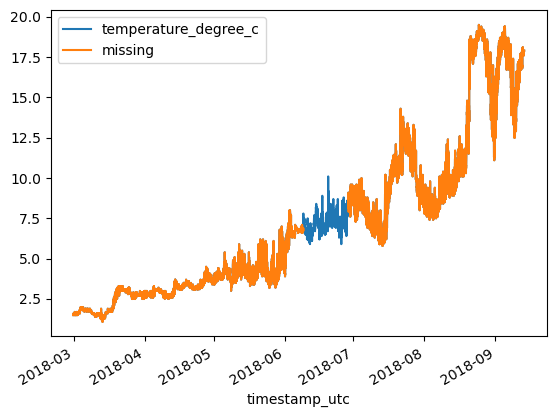

In [46]:
df.plot()

In [53]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

<Axes: xlabel='timestamp_utc'>

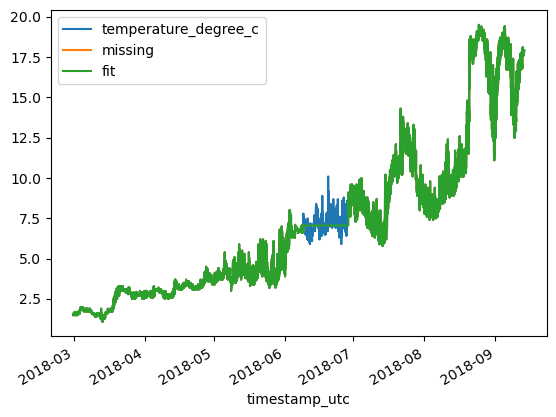

In [52]:
impute_it = IterativeImputer()

df['fit'] = impute_it.fit_transform(df[['missing']])

df.plot()

<Axes: xlabel='timestamp_utc'>

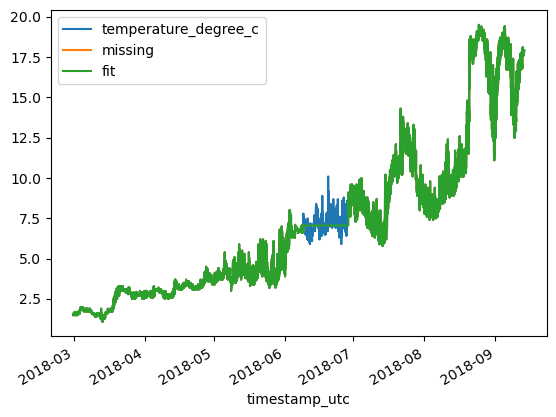

In [54]:
impute_knn = KNNImputer(n_neighbors=2)

df['fit'] = impute_knn.fit_transform(df[['missing']])

df.plot()

In [38]:
imp_mean = SimpleImputer(strategy='median')

df['fit'] = imp_mean.fit_transform(df_missing)

<Axes: xlabel='timestamp_utc'>

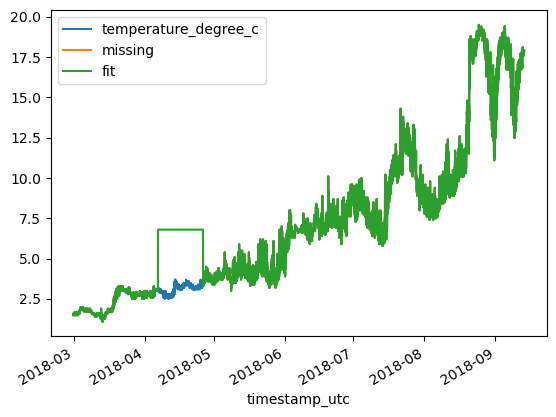

In [39]:
df.plot()

In [82]:
df.columns

Index(['temperature_degree_c', 'qc_flag_temperature_degree_c', 'missing',
       'fit'],
      dtype='object')

In [58]:
import missforest

In [90]:
df['time'] = df.index.day_of_year

In [91]:
from missforest import MissForest
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

clf = RandomForestClassifier(n_jobs=-1)
rgr = RandomForestRegressor(n_jobs=-1)

# Initialize the magical forest
#imputer = MissForest(clf, rgr)
imputer = MissForest()

# Impute away
df_imputed = imputer.fit_transform(df[['time', 'missing']])


/home/jmunroe/miniforge3/lib/python3.12/site-packages/missforest/missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.78it/s]
/home/jmunroe/miniforge3/lib/python3.12/site-packages/missforest/missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
/home/jmunroe/miniforge3/lib/python3.12/site-packages/missforest/missforest.py:494: UserWarning: In version 4.2.3, estimator fitting process is moved to `fit` method. `MissForest` will now imputes unseen missing values with fitted estimators with `transform` method. To retain the old behaviour, use `fi

In [92]:
df['fit'] = df_imputed['missing']
df.drop(columns='time', inplace=True)

<Axes: xlabel='timestamp_utc'>

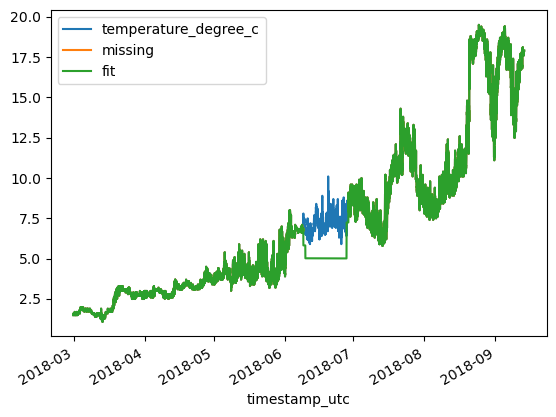

In [93]:
df.plot()